In [4]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

`m` is for money, in \$.    
`eta` is the production throughput, in \$/mass  



In [87]:
def dUdt(U, t, i):
    m, eta = U
    
    alpha = 1  # $/mass,  yield
    beta = 0.1 # mass/s2/$
    
    dmdt = alpha*eta - i(t)*m
    detadt = beta*m*i(t)
    
    return (dmdt, detadt)

In [91]:
t_span = np.linspace(0, 80, 200)
U0 = (1, 1)

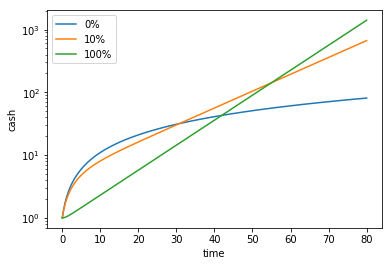

In [92]:
plt.semilogy(t_span, odeint(dUdt, U0, t_span, args=(lambda t:0.,))[:, 0], label='0%');
plt.semilogy(t_span, odeint(dUdt, U0, t_span, args=(lambda t:0.1,))[:, 0], label='10%');
plt.semilogy(t_span, odeint(dUdt, U0, t_span, args=(lambda t:1.0,))[:, 0], label='100%');
plt.xlabel('time'); plt.ylabel('cash'); plt.legend();

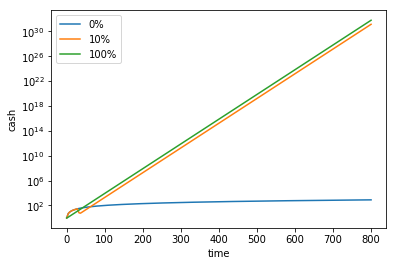

In [90]:
plt.semilogy(t_span, odeint(dUdt, U0, t_span, args=(lambda t:0.,))[:, 0], label='0%');
plt.semilogy(t_span, odeint(dUdt, U0, t_span, args=(lambda t:0 if t<30 else 0.998,))[:, 0], label='10%');
plt.semilogy(t_span, odeint(dUdt, U0, t_span, args=(lambda t:1.0,))[:, 0], label='100%');
plt.xlabel('time'); plt.ylabel('cash'); plt.legend();

In [471]:
def dUdt(U, t, percent_in_prod):
    stuff, margin = U
    percent_in_prod = percent_in_prod(t)
    eta_invest = 0.1 # mass/s2/$  R&D eff.
    
    dstuff_dt = stuff*percent_in_prod*margin - stuff*(1-percent_in_prod)
    dmargin_dt = (1-percent_in_prod)*eta_invest # stuff
    
    return (dstuff_dt, dmargin_dt)

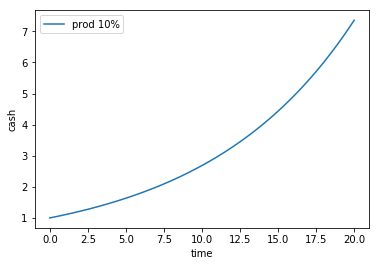

In [472]:
t_span = np.linspace(0, 20., 100)
U0 = (1, 0.1)

#plt.semilogy(t_span, odeint(dUdt, U0, t_span, args=(lambda t:1.00,))[:, 0], label='prod 100%');
#plt.plot(t_span, odeint(dUdt, U0, t_span, args=(lambda t:0.90,))[:, 0], label='prod 90%');
#plt.plot(t_span, odeint(dUdt, U0, t_span, args=(lambda t:0.80,))[:, 0], label='prod 80%');
#plt.plot(t_span, odeint(dUdt, U0, t_span, args=(lambda t:0.85,))[:, 0], label='prod 85%');
plt.plot(t_span, odeint(dUdt, U0, t_span, args=(lambda t:.998,))[:, 0], label='prod 10%');

plt.xlabel('time'); plt.ylabel('cash'); plt.legend();

In [459]:
i_span = np.linspace(0.1, 1, 100)
stuff_at_20 = [odeint(dUdt, U0, [0, 220], args=(lambda t:i,))[-1, 0]
               for i in i_span]

/home/navarro/autres/answerStack/py3/lib/python3.5/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


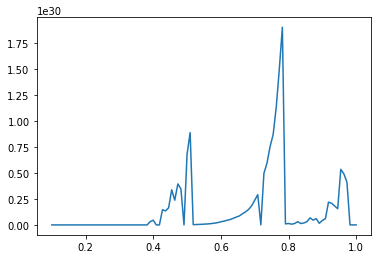

In [460]:
plt.plot(i_span, stuff_at_20)

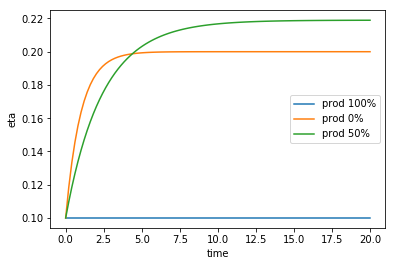

In [269]:
plt.plot(t_span, odeint(dUdt, U0, t_span, args=(lambda t:1.00,))[:, 1], label='prod 100%');
plt.plot(t_span, odeint(dUdt, U0, t_span, args=(lambda t:0.,))[:, 1], label='prod 0%');
plt.plot(t_span, odeint(dUdt, U0, t_span, args=(lambda t:0.5,))[:, 1], label='prod 50%');
plt.xlabel('time'); plt.ylabel('eta'); plt.legend();

In [288]:
class Machine():
    
    def __init__(self):
        self.time = 0
        self.stuff = 10
        self.margin = 0.1
        self.RD_yield = 0.01
        
    def produce(self, percent):
        stuff = self.stuff
        self.stuff += stuff*percent*self.margin - stuff*(1-percent)
        self.margin += (1-percent)*stuff*self.RD_yield
        self.time +=1
        
    def __repr__(self):
        return str((self.time, self.stuff, self.margin))

In [322]:
M = Machine()
M

(0, 10, 0.1)

In [362]:
M.produce(1.0)
M

(40, 12490.786700823883, 0.2919579860642658)

In [370]:
M = Machine()
M

(0, 10, 0.1)

In [410]:
M.produce(.950)
M

(40, 2.071568575870598e+199, 1.4210480816322934e+121)